<a href="https://highway.esa.int/">
    <span style=float:left>
        <img src='./img/highway_logo.svg' alt='HIGHWAY' align='center' width='150px'></img>
    </span>
</a>
<a href="https://www.esa.int/">
    <span style=float:right>
        <img src='./img/ESA_logo_2020_White.png' alt='HIGHWAY' align='center' width='250px'></img>
    </span>
</a>

# <font color='blue'> **The HIGHWAY Advanced Data Access** </font>

### **Introduction**

This notebook will introduce the **Advanced Data Access (ADA) service** that allows to explore the [**HIGHWAY**](https://highway.esa.int/) catalogue, to access its products and exploit them in a Python programming environment.

### **Importing required libraries**

In [45]:
import os
import requests
import zipfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import warnings
import colormaps as cmaps
import getpass
from lib.HIGHWAY_auth import connection_desp
from lib.request_functions import display_metadata, display_result, temporal_search, download_request

warnings.filterwarnings("ignore")


def print_dataset_item(print_item):
    print('-' * 30)
    print(print_item['datasetId'])
    print(print_item['title'])

    wms = False
    if print_item.get('services', None):
        for j in print_item.get('services', None):
            if j['title'] == 'wms':
                print('WMS Server: ', j['href'])
                wms = True
    if not wms:
        print("No WMS service available for this dataset.")

    wcs = False
    if print_item.get('services', None):
        for j in print_item.get('services', None):
            if j['title'] == 'wcs':
                print('WCS Server: ', j['href'])
                wcs = True
    if not wcs:
        print("No WCS service available for this dataset.")



<hr>

#### <font color='blue'> **Step 1:** </font> **Authentication**

The user can access the HIGHWAY catalogue and exploit its functionalities only after an authentication pprocess, that requires to provide the user credentials while running the two following cells of code:

In [19]:
# if you want to test faster, you can create a file password.py with two variable username and password with your own credential
CREDENTIALS_FILE = "password.py"

if os.path.exists(CREDENTIALS_FILE):
    import password as pw

    username = pw.username
    password = pw.password
    print("Using credentials from file.")
else:
    username = getpass.getpass('Type your username: ')
    password = getpass.getpass('Type your password: ')

# HIGHWAY token generation
access_token = connection_desp(username, password)


Using credentials from file.


<hr>

#### <font color='blue'> **Step 2.** </font> **Browsing the catalogue**

Now everything is ready to browse the HIGHWAY catalogue and access the data.
First it is necessary to define the endpoint that will be used to enter the service. A set of auxiliary functions, prepared to help the user display the result of each data discovery/access operation, will be loaded to be used in the notebook.

In [20]:
endpoint = "https://ds.highway.esa.int/ada"

The following code requests the full list of datasets from the HIGHWAY catalogue. The list is returned as a **Json** object and it will be visualized as a user-friendly output.

In [44]:
#-------------------------running the GET request------------------------------------
getDatasets = requests.get(endpoint + '/opensearch/datasets').json()

#---------------------visualizing the list of datasets-------------------------------
for dataset in getDatasets['features'][:10]:  # We print only the first ten datasets information.
    print_dataset_item(dataset)



------------------------------
HIGHWAY_Swarm_TEC_TMS_2F
Ionospheric total electron content Product in cloud-native data format
No WMS service available for this dataset.
No WCS service available for this dataset.
------------------------------
HIGHWAY_Swarm_MM_CON_EPH_2_
Conjunction information Product in cloud-native data format
No WMS service available for this dataset.
No WCS service available for this dataset.
------------------------------
HIGHWAY_Swarm_MIT__LP_2F
Midlatitude Ionospheric Trough Boundaries and Minima derived from LP (Langmuir Probe) Product in cloud-native data format
No WMS service available for this dataset.
No WCS service available for this dataset.
------------------------------
HIGHWAY_Swarm_MIT_TEC_2F
Midlatitude Ionospheric Trough Boundaries and Minima derived from TEC Product in cloud-native data format
No WMS service available for this dataset.
No WCS service available for this dataset.
------------------------------
HIGHWAY_Swarm_IPD_IRR_2F
Ionospheric Pl

<hr>

#### <font color='blue'> **Step 3.** </font>  **Metadata extraction**

From the list of datasets the user can now select the one of interest and visualize a summary of its metadata. Let's first choose a dataset:

In [22]:
datasetId = 'HIGHWAY_L3_SIT_Open_MIR_SIT_3C'

Once the dataset has been selected, it is possible to visualize the related metadata:

In [23]:
#---------------------running the GET request--------------------------------
getDatasets = requests.get(endpoint + '/opensearch/datasets').json()

#---------------------visualizing the metadata-------------------------------
display_metadata(endpoint, datasetId, getDatasets)

Metadata of SMOS L3 Sea Ice Thickness in cloud-native format:

Description: The SMOS Level 3 Sea Ice Thickness product in cloud-native format provides daily estimations of SMOS retrieved sea ice thickness (and its uncertainty) at the edge of the Arctic Ocean during the October-April (winter) season, from year 2010 onwards. This product is available in Zarr data format according to Earth Observation Processor Framework (EOPF).
Format for download: ZARR
Temporal coverage: 2010-04-15T00:00:00Z - 2025-08-03T00:00:00Z
Variables: (['sea_ice_thickness', 'sice', 'tb', 'tsurf'])
Total number of products: 5572


<hr>

#### <font color='blue'> **Step 4.** </font> **Basic search operation**
As the first example of data discovery for the HIGHWAY data access, a generic product search is implemented, just providing the **datasetID** of the desired dataset and the **maximum number of results** to display for each page.  The output will be a **Json** object containing the metadata of the latest 10 products available in the catalogue. For each product, a short selection of its metadata will be printed in the list.

In [24]:
#--------------defining the input parameters for the search operation----------------
maxRecords = '10'
start_Index = '0'

Once the values of the parameters have been assigned, the ADA API request can be defined and executed.The output will be a **Json** object containing the metadata of the latest 10 products available in the catalogue. For each product, a short selection of its metadata will be printed in the list.

In [25]:
data = {  #payload for the POST request
    "maxRecords": maxRecords,
    "startIndex": start_Index
}

#--------------running the POST request----------------
getProducts = requests.post(endpoint + "/opensearch/search/" + datasetId, data=data)
results = getProducts.json()

#--------------visualizing the results of the search----------------
display_result(results, maxRecords)

Total number of products: 5572
List of the 10 most recent products
-----------------------------------------------
#1

product: SMOS_Icethickness_v3.3_south_20250803
product date: 2025-08-03T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL3NvdXRoLzIwMjUvMDgvU01PU19JY2V0aGlja25lc3NfdjMuM19zb3V0aF8yMDI1MDgwMy56YXJy
-----------------------------------------------
#2

product: SMOS_Icethickness_v3.3_south_20250802
product date: 2025-08-02T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL3NvdXRoLzIwMjUvMDgvU01PU19JY2V0aGlja25lc3NfdjMuM19zb3V0aF8yMDI1MDgwMi56YXJy
-----------------------------------------------
#3

product: SMOS_Icethickness_v3.3_south_20250801
product date: 2025-08-01T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL3NvdXRoLzIwMjUvMDgvU01PU19JY2V0aGlja25lc3NfdjMuM19zb3V0aF8yMDI1MDgwMS56YXJy
-----------------------------------------------
#4

product: SMOS_Icethickness_v3.3_south_20250731
product date: 2025-07-31T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL3NvdXRoLzIwMjUvMD

<hr>

#### <font color='blue'> **Step 5.** </font> **Temporal search operation**
Besides the generic search, it is possible to add a temporal filtering that allows the user to select the products of a dataset for a specific **TOI** (Time Of Interest). In this case two more elements should be included in the list of input parameters: the starting date (**startDate**) and ending date (**endDate**). The result of the request will be a **Json** object containing the latest 10 (or fewer) products available in the catalogue with the defined temporal constraint. For each product, a selection of its metadata will be printed in the list. The list of inputs is assigned as follows:

In [26]:
maxRecords = '10'
start_index = '0'
start_date = '2024-11-10T00:00:00Z'
end_date = '2024-12-18T00:00:00Z'

Then the user can run again a request similar to the one in **Step 4**:

In [27]:
data = {
    "maxRecords": maxRecords,  # Payload for the POST request
    "startIndex": start_index,
    "startDate": start_date,
    "endDate": end_date
}

#-------------------running the POST request---------------------
getProducts = requests.post(endpoint + "/opensearch/search/" + datasetId, data=data)
results = getProducts.json()

#--------------visualizing the results of the search----------------
results = temporal_search(results, maxRecords)

Total number of products: 39
List of the 10 most recent products
-----------------------------------------------
#1

product: SMOS_Icethickness_v3.3_north_20241218
product date: 2024-12-18T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL25vcnRoLzIwMjQvMTIvU01PU19JY2V0aGlja25lc3NfdjMuM19ub3J0aF8yMDI0MTIxOC56YXJy
-----------------------------------------------
#2

product: SMOS_Icethickness_v3.3_north_20241217
product date: 2024-12-17T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL25vcnRoLzIwMjQvMTIvU01PU19JY2V0aGlja25lc3NfdjMuM19ub3J0aF8yMDI0MTIxNy56YXJy
-----------------------------------------------
#3

product: SMOS_Icethickness_v3.3_north_20241216
product date: 2024-12-16T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL25vcnRoLzIwMjQvMTIvU01PU19JY2V0aGlja25lc3NfdjMuM19ub3J0aF8yMDI0MTIxNi56YXJy
-----------------------------------------------
#4

product: SMOS_Icethickness_v3.3_north_20241215
product date: 2024-12-15T00:00:00Z
direct download: U01PUy9MM19TSVQvTDNDL25vcnRoLzIwMjQvMTIv

<hr>

#### <font color='blue'> **Step 6.** </font> **Download process**

When a single product has been selected by the user, the download process can start. The process is made of multiple sequential steps which are encapsulated in the auxiliary function **download_request**

In [28]:
select = input('which of the displayed 10 products do you want to download? (type one number in the range 1-10) : ')
#--------------setting the parameters for the download request----------------

location = results[int(select) - 1]['location']
print(results[int(select) - 1])
filename = download_request(endpoint, location, access_token)

{'product_id': 'SMOS_Icethickness_v3.3_north_20241211', 'location': 'U01PUy9MM19TSVQvTDNDL25vcnRoLzIwMjQvMTIvU01PU19JY2V0aGlja25lc3NfdjMuM19ub3J0aF8yMDI0MTIxMS56YXJy'}
200
202
202
202
202
200
Download complete!


<hr>

#### <font color='blue'> **Step 7.** </font> **Data visualization**

The product has been downloaded as  a **.zip** file, so the following steps will guide the user to the visualization for the data of interest:
* unzip the original product (**ZARR**) format
* read the original product
* select the variable of interest
* visualization

First step is to unzip the downloaded product, the result is a **ZARR** file containing the native data:

In [29]:
#------------unpack the ZARR file-------------------

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(path=filename.split('.zip')[0])

ds = xr.open_datatree(filename.split('.zip')[0])Now the Zarr file has been unpacked in the same directory where this notebook is running. The file will be now opened with the **xarray** library. According to the **Zarr** standard, that is compliant with the [**EOPF**](https://eopf.copernicus.eu/) data model, the data structure is arranged in groups, each of them with its own set of variables. It is possible to see which are the available groups after opening the file:

In [30]:
#------------read the ZARR file-------------------

ds = xr.open_datatree(filename.split('.zip')[0], engine='zarr')
ds.groups

('/', '/measurements', '/quality')

The geophysical variables are usually stored in the **measurements** group, so the user can access visualize its content with the following istruction:

In [31]:
#-----------selecting the group of interest-------------

variables = ds['measurements']
variables

<xarray.DataTree 'measurements'>
Group: /measurements
    Dimensions:            (y: 896, x: 608, time: 1)
    Coordinates:
        latitude           (y, x) float32 2MB ...
        longitude          (y, x) float32 2MB ...
      * time               (time) datetime64[ns] 8B 2024-12-11T12:00:00
      * x                  (x) float32 2kB -3.844e+03 -3.831e+03 ... 3.744e+03
      * y                  (y) float32 4kB -5.344e+03 -5.331e+03 ... 5.844e+03
    Data variables:
        sea_ice_thickness  (time, y, x) float64 4MB ...
        sice               (time, y, x) float64 4MB ...
        tb                 (time, y, x) float64 4MB ...
        tsurf              (time, y, x) float64 4MB ...
    Attributes: (12/34)
        cdm_data_type:             Grid
        contributor_name:          Xiangshan Tian-Kunze (AWI), Lars Kaleschke (AW...
        date_created:              Thu Dec 12 19:02:36 2024
        doi:                       https://doi.org/10.57780/sm1-5ebe10b
        geospatial_bounds_crs:     EPSG:3413
        geospatial_lat_max:        90.0
        ...                        ...
        time_coverage_end:         2024-12-11T23:59:59
        time_coverage_resolution:  P1D
        time_coverage_start:       2024-12-11T00:00:00
        title:                     Daily gridded sea-ice thickness and auxiliary ...
        topiccategory:             Oceans Climatology Meteorology Atmosphere
        tracking_id:               ce42ca22-3469-49a0-957e-546886d55859

This group contains the geophysical variables and it possible to select one of them to work with its data.

In [32]:
#-----------selecting the variable of interest-------------

SIT = variables['sea_ice_thickness']
SIT

<xarray.DataArray 'sea_ice_thickness' (time: 1, y: 896, x: 608)> Size: 4MB
[544768 values with dtype=float64]
Coordinates:
    latitude   (y, x) float32 2MB ...
    longitude  (y, x) float32 2MB ...
  * time       (time) datetime64[ns] 8B 2024-12-11T12:00:00
  * x          (x) float32 2kB -3.844e+03 -3.831e+03 ... 3.731e+03 3.744e+03
  * y          (y) float32 4kB -5.344e+03 -5.331e+03 ... 5.831e+03 5.844e+03
Attributes:
    _CRS:           {'wkt': 'PROJCS["WGS 84 / NSIDC Sea Ice Polar Stereograph...
    long_name:      SMOS sea ice thickness
    standard_name:  sea ice thickness
    units:          m

After extracting the variable of interest, the related coordinates are clearly visible and they can be used to visualize the data on a projected map, selecting the longitude and latitude values to use.

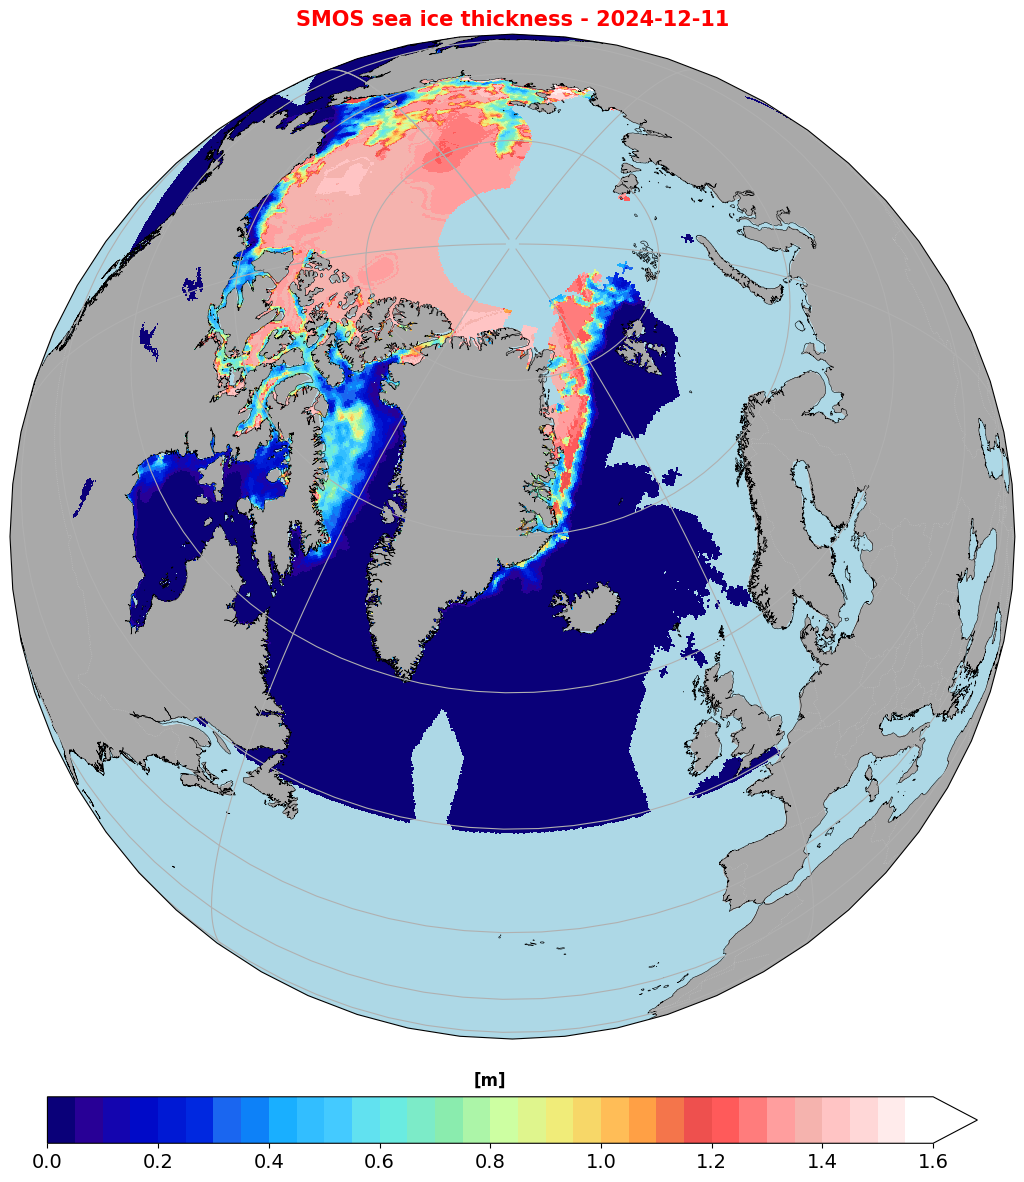

In [33]:
#-----------------data visualization-------------------

sea_ice_thickness = SIT[0, :, :]  # values to plot
latitude = SIT.latitude  # matrix of latitude values
longitude = SIT.longitude  # matrix of longitude values
date = str(SIT['time'].values)[2:12]  # date of acquisition
title = SIT.attrs['long_name']  # name of the variable
cmap = cmaps.GMT_haxby

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(
    projection=ccrs.NearsidePerspective(central_longitude=-30.0, central_latitude=70, satellite_height=5500000,
                                        false_easting=0, false_northing=0))
ax.set_global()
img = ax.pcolormesh(longitude, latitude, sea_ice_thickness, shading='auto', cmap=cmap, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m', linewidth=0.4, edgecolor='white')
ax.add_feature(cfeature.LAND, facecolor='darkgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='silver')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines()
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.08, pad=0.05, shrink=0.8, extend='max')
cbar.ax.set_title('[m]', fontsize=12, fontweight='bold', pad=8)
cbar.ax.tick_params(labelsize=14)
plt.title(title + " - " + date, fontweight='bold', color='red', fontsize=15)
plt.savefig(filename.split('.zarr.zip')[0] + '.png', bbox_inches='tight', dpi=300)
plt.show()

<hr>

Code example provided by <a href='https://meeo.it/'>MEEO</a>

<a href="https://highway.esa.int/">
    <span style=float:left>
        <img src='./img/highway_logo.svg' alt='HIGHWAY' align='center' width='150px'></img>
    </span>
</a>
<a href="https://www.esa.int/">
    <span style=float:right>
        <img src='./img/ESA_logo_2020_White.png' alt='HIGHWAY' align='center' width='250px'></img>
    </span>
</a>